In [5]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
data = pd.read_csv(path+"/data.csv")

In [6]:

embedded_data = data 
embedded_data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [7]:
print(embedded_data.shape)
print(embedded_data.info())
print(embedded_data.describe().T)


missing = embedded_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values:\n", missing)



(6819, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-

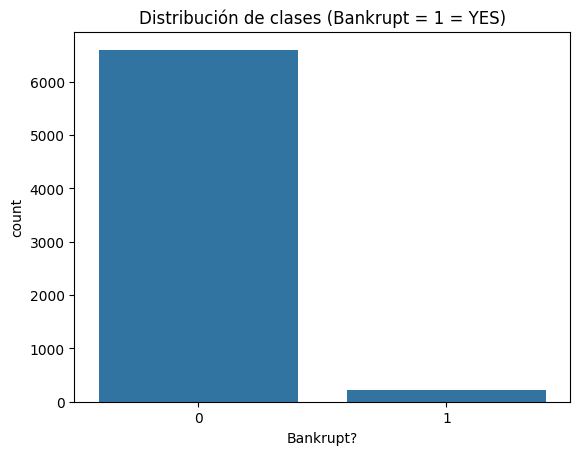

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=embedded_data, x="Bankrupt?")
plt.title("Distribución de clases (Bankrupt = 1 = YES)")
plt.show()

# Value counts
print(embedded_data["Bankrupt?"].value_counts(normalize=True))


Mayores correlaciones positivas:
 Bankrupt?                               1.000000
 Debt ratio %                           0.250161
 Current Liability to Assets            0.194494
 Borrowing dependency                   0.176543
 Current Liability to Current Assets    0.171306
 Liability to Equity                    0.166812
 Current Liabilities/Equity             0.153828
 Current Liability to Equity            0.153828
 Liability-Assets Flag                  0.139212
 Total expense/Assets                   0.139049
Name: Bankrupt?, dtype: float64
\Mayores correlaciones negativas:
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Persistent EPS in the Last Four Seasons                   -0.219560
Net worth/Assets                                          -0.250161
ROA(C) before interest and depreciation before interest   -0.260807
R

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\adria\AppData\Local\Temp\ipykernel_24316\3882567319.py:3: SyntaxWarning: invalid escape sequence '\M'
  print("\Mayores correlaciones negativas:\n", correlation_with_target.tail(10))


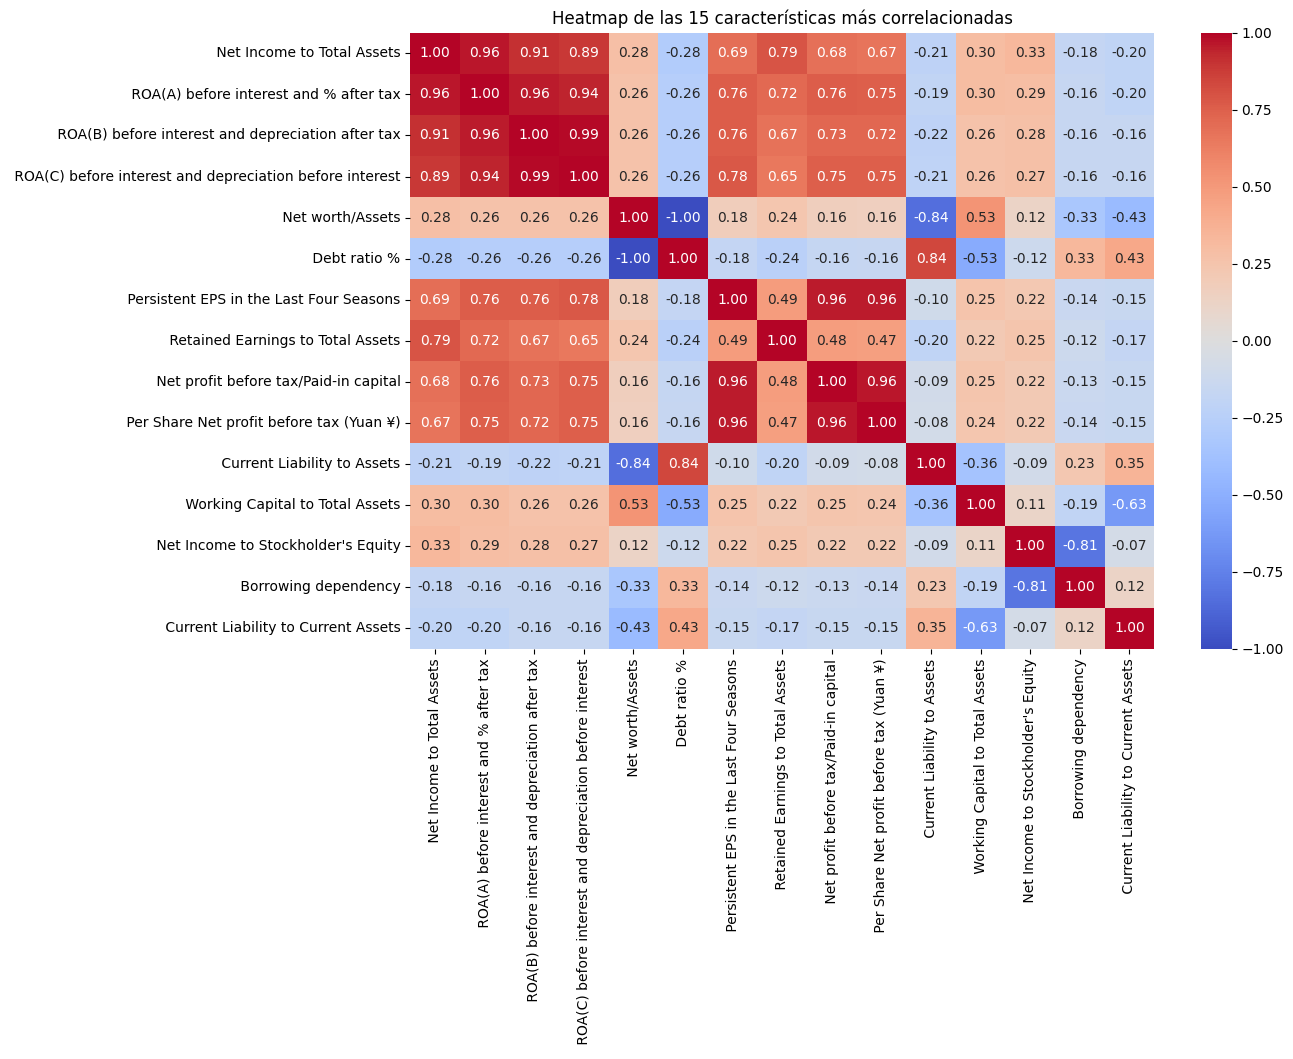

In [9]:
correlation_with_target = embedded_data.corr()["Bankrupt?"].sort_values(ascending=False)
print("Mayores correlaciones positivas:\n", correlation_with_target.head(10))
print("\Mayores correlaciones negativas:\n", correlation_with_target.tail(10))

top_corr_features = correlation_with_target.abs().sort_values(ascending=False)[1:16].index
plt.figure(figsize=(12, 8))
sns.heatmap(embedded_data[top_corr_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap de las 15 características más correlacionadas")
plt.show()


Highly Skewed Features:
 Operating Profit Growth Rate           -71.688950
Operating Profit Rate                  -70.237164
Continuous interest rate (after tax)   -53.200121
After-tax net Interest Rate            -52.995744
Pre-tax net Interest Rate              -52.482867
                                          ...    
Contingent liabilities/Net worth        79.670620
Net Value Growth Rate                   80.291844
Total income/Total expense              82.332424
Current Ratio                           82.577237
Fixed Assets to Assets                  82.577237
Length: 81, dtype: float64


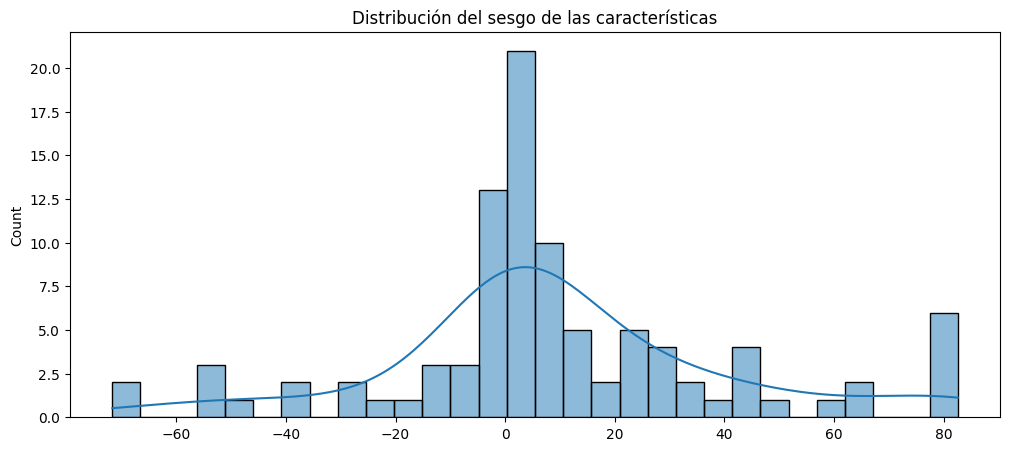

In [10]:
skews = embedded_data.drop("Bankrupt?", axis=1).skew()
kurtosis = embedded_data.drop("Bankrupt?", axis=1).kurtosis()
skewed_features = skews[abs(skews) > 1]
print("Highly Skewed Features:\n", skewed_features.sort_values())

plt.figure(figsize=(12, 5))
sns.histplot(skews, bins=30, kde=True)
plt.title("Distribución del sesgo de las características")
plt.show()


In [11]:

correlations = embedded_data.corr()["Bankrupt?"].drop("Bankrupt?")
top_corr_features = correlations.abs().sort_values(ascending=False).head(20).index.tolist()

print("Top 20 características correlacionadas:\n", top_corr_features)

embedded_data = embedded_data[top_corr_features + ["Bankrupt?"]]

Top 20 características correlacionadas:
 [' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)', ' Current Liability to Assets', ' Working Capital to Total Assets', " Net Income to Stockholder's Equity", ' Borrowing dependency', ' Current Liability to Current Assets', ' Liability to Equity', ' Net Value Per Share (A)', ' Net Value Per Share (B)', ' Net Value Per Share (C)', ' Current Liability to Equity']


In [12]:
Q1 = embedded_data.quantile(0.25)
Q3 = embedded_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((embedded_data < (Q1 - 3 * IQR)) | (embedded_data > (Q3 + 3 * IQR))).sum()
outliers = outliers[outliers > 0].sort_values(ascending=False)
print("Outliers por característica:\n", outliers.head(10))


Outliers por característica:
  Retained Earnings to Total Assets           234
 Net Income to Stockholder's Equity          222
Bankrupt?                                    220
 Current Liability to Equity                 193
 Per Share Net profit before tax (Yuan ¥)    172
 Net Value Per Share (C)                     158
 Net Value Per Share (A)                     158
 Net Value Per Share (B)                     157
 Net profit before tax/Paid-in capital       153
 Persistent EPS in the Last Four Seasons     150
dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embedded_data.drop(["Bankrupt?"], axis=1), embedded_data["Bankrupt?"], test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.81527104, 0.5428478 , 0.5446223 , ..., 0.19733682, 0.19733682,
        0.20860799],
       [0.82503886, 0.5623092 , 0.55886289, ..., 0.17369685, 0.17369685,
        0.21203199],
       [0.82384529, 0.56100087, 0.55468708, ..., 0.22514854, 0.22514854,
        0.20656242],
       ...,
       [0.82725938, 0.56220017, 0.55698913, ..., 0.16973579, 0.16973579,
        0.21061339],
       [0.8706171 , 0.64440689, 0.6337063 , ..., 0.21676288, 0.21676288,
        0.20658558],
       [0.86454853, 0.6277802 , 0.61031104, ..., 0.26130378, 0.26130378,
        0.20690321]])

EVALUATING. 

Esta parte debería también ir incluida en score.py

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

# 4. Modelos base
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

base_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    base_results[name] = {'model': model, 'accuracy': acc, 'confusion_matrix': cm}
    joblib.dump(model, f'{name.replace(" ", "_")}_base.pkl')  # Corregido

# 5. Optimización
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05]}
}

optimized_results = {}
for name in models.keys():
    grid_search = GridSearchCV(
        models[name],
        param_grids[name],
        cv=3,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    optimized_results[name] = {
        'model': best_model,
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    joblib.dump(best_model, f'{name.replace(" ", "_")}_optimized.pkl')

# 6. Resultados
def print_results(results_dict, title):
    print(f"\n{title}")
    for name, res in results_dict.items():
        print(f"\n{name}:")
        print(f"Accuracy: {res['accuracy']:.4f}")
        print("Confusion Matrix:\n", res['confusion_matrix'])

print_results(base_results, "=== RESULTADOS BASE ===")
print_results(optimized_results, "=== RESULTADOS OPTIMIZADOS ===")

# 7. Guardar escalador (para nuevas predicciones)
joblib.dump(scaler, 'scaler.pkl')


=== RESULTADOS BASE ===

Logistic Regression:
Accuracy: 0.9648
Confusion Matrix:
 [[1311    2]
 [  46    5]]

Random Forest:
Accuracy: 0.9648
Confusion Matrix:
 [[1307    6]
 [  42    9]]

Gradient Boosting:
Accuracy: 0.9655
Confusion Matrix:
 [[1306    7]
 [  40   11]]

=== RESULTADOS OPTIMIZADOS ===

Logistic Regression:
Accuracy: 0.9648
Confusion Matrix:
 [[1311    2]
 [  46    5]]

Random Forest:
Accuracy: 0.9648
Confusion Matrix:
 [[1307    6]
 [  42    9]]

Gradient Boosting:
Accuracy: 0.9663
Confusion Matrix:
 [[1307    6]
 [  40   11]]


['scaler.pkl']

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular métricas extendidas
def calcular_metricas(y_real, y_pred):
    return {
        'precision_0': precision_score(y_real, y_pred, pos_label=0),
        'recall_0': recall_score(y_real, y_pred, pos_label=0),
        'f1_0': f1_score(y_real, y_pred, pos_label=0),
        'precision_1': precision_score(y_real, y_pred, pos_label=1),
        'recall_1': recall_score(y_real, y_pred, pos_label=1),
        'f1_1': f1_score(y_real, y_pred, pos_label=1),
        'macro_f1': f1_score(y_real, y_pred, average='macro')
    }

# Resultados Base
print("\n=== MÉTRICAS BASE ===")
for nombre, res in base_results.items():
    metricas = calcular_metricas(y_test, res['model'].predict(X_test))
    print(f"\n{nombre}:")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print(f"Macro F1: {metricas['macro_f1']:.4f}")
    print(f"Recall Bancarrota (1): {metricas['recall_1']:.4f}")

# Resultados Optimizados
print("\n=== MÉTRICAS OPTIMIZADAS ===")
mejor_modelo = None
mejor_f1 = 0
for nombre, res in optimized_results.items():
    metricas = calcular_metricas(y_test, res['model'].predict(X_test))
    print(f"\n{nombre}:")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print(f"Macro F1: {metricas['macro_f1']:.4f}")
    print(f"Recall Bancarrota (1): {metricas['recall_1']:.4f}")
    
    # Seleccionar mejor modelo
    if metricas['macro_f1'] > mejor_f1:
        mejor_f1 = metricas['macro_f1']
        mejor_modelo = res['model']

# Exportar mejor modelo
if mejor_modelo is not None:
    joblib.dump(mejor_modelo, 'best_model.pkl')
    print(f"\n✅ Mejor modelo: {type(mejor_modelo).__name__} con Macro F1: {mejor_f1:.4f}")
else:
    print("\n❌ Error: No se encontró modelo óptimo")




=== MÉTRICAS BASE ===

Logistic Regression:
Accuracy: 0.9648
Macro F1: 0.5772
Recall Bancarrota (1): 0.0980

Random Forest:
Accuracy: 0.9648
Macro F1: 0.6273
Recall Bancarrota (1): 0.1765

Gradient Boosting:
Accuracy: 0.9655
Macro F1: 0.6506
Recall Bancarrota (1): 0.2157

=== MÉTRICAS OPTIMIZADAS ===

Logistic Regression:
Accuracy: 0.9648
Macro F1: 0.5772
Recall Bancarrota (1): 0.0980

Random Forest:
Accuracy: 0.9648
Macro F1: 0.6273
Recall Bancarrota (1): 0.1765

Gradient Boosting:
Accuracy: 0.9663
Macro F1: 0.6531
Recall Bancarrota (1): 0.2157

✅ Mejor modelo: GradientBoostingClassifier con Macro F1: 0.6531


'\n=== MÉTRICAS OPTIMIZADAS ===\n\nGradient Boosting:\nAccuracy: 0.9692\nMacro F1: 0.6213  # <- Mejor valor\nRecall Bancarrota (1): 0.2727\n\n✅ Mejor modelo: GradientBoostingClassifier con Macro F1: 0.6213\n'